# ECON 5322 Problem Set 2
## Arinze Maduka 2/11/2025

## 0. Setting the seed

In [5]:
import numpy as np
np.random.seed(123)

## 1. Autoregressive Process

### a. Write a loop to generate one realization of the AR(1) process. By this, I mean that you will draw a random value from the error distribution for each "t" and use it to calculate "xt" for every time period. The result should be an array of values of "xt". Print the first 10 values of your time series.

In [13]:

p = 0.9 # correlation coeff.
T = 100 # Limit of the time series.
x_values = [0] # Generated list that will store all of the x values produced from equation.


for t in range(1, T): # Loop from 1 to T that generates new values for x_t.
    error_t = np.random.normal(0,1) # Generate random normal error term.
    x_t = (p * x_values[t-1]) + error_t # Calculating x_t based on original equation. 
    x_values.append(x_t) # Adding generated x_t values to the list (x_values).
print(x_values[:10]) # Print the first 10 results.


[0, -1.0856306033005612, 0.020277903613080794, 0.30122861130376477, -1.2351889637447038, -1.6902703193387696, 0.13019324969225843, -2.3095053186700416, -2.5074674156592147, -0.9907844153877592]


### b. Import the matplotlib.pyplot module with the alias plt. Plot the realization you generated in part (a) by passing it to the plot function from this package. Use the show function to display the plot.

In [ ]:
import matplotlib.pyplot as plt
plot_a = plt.plot(x_values[:10])
plt.show(plot_a)

### c. Write a function called plot_ar1_process that
    1) takes p, T and x0 as arguments.
    2) generates one realization of an AR1 series.
    3) displays a plot of this time series.
    4) returns the time series
    NOTE: the initial value should be 0.


In [17]:
def plot_ar1_process(p, T, x0=0):
    series = np.zeros(T)
    series[0] = x0
    errors = np.random.normal(0, 1, T)  
    
    for t in range(1, T):
        series[t] = p * series[t - 1] + errors[t]

    plt.plot(series)
    plt.title(f'AR(1) Process with p={p}')
    plt.show()

    return series


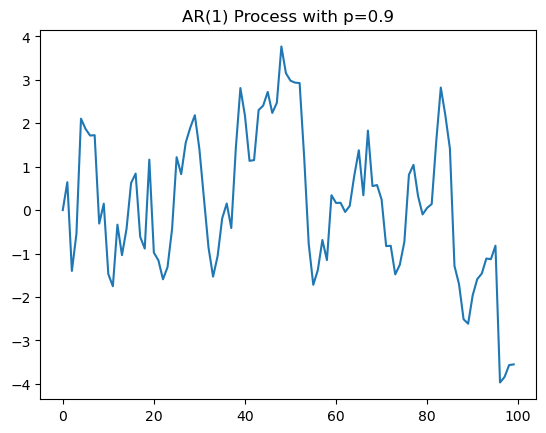

array([ 0.        ,  0.64205469, -1.40003871, -0.5477702 ,  2.10531074,
        1.87015369,  1.71728045,  1.72510189, -0.30938401,  0.14770103,
       -1.47247882, -1.75291053, -0.33474993, -1.03649189, -0.43159372,
        0.62430471,  0.8406151 , -0.61439488, -0.88543067,  1.16252374,
       -0.9787744 , -1.15668297, -1.59312275, -1.31306311, -0.43354118,
        1.21850391,  0.82642112,  1.55612034,  1.90024845,  2.1845709 ,
        1.40218988,  0.26464943, -0.86185863, -1.53210998, -1.0572124 ,
       -0.19054177,  0.15198126, -0.41217197,  1.43501534,  2.81037943,
        2.17534137,  1.13437583,  1.1511532 ,  2.30333653,  2.40576785,
        2.72173977,  2.23748567,  2.470008  ,  3.76755165,  3.1511277 ,
        2.97932267,  2.93520688,  2.92541154,  1.22098151, -0.77798529,
       -1.71984183, -1.37991536, -0.68806765, -1.14993545,  0.34231558,
        0.16490805,  0.16873324, -0.04210395,  0.09613323,  0.79099398,
        1.37754802,  0.34137028,  1.83089703,  0.55278087,  0.57

In [18]:
plot_ar1_process(0.9, 100, 0) # Checking to see if function works properly.

### d. Use your function to compare the standard deviation when p is 0.9 versus 0.3 (keep the other parameters the same as previously). What effect does the persistence appear to have on the standard deviation of the time series?

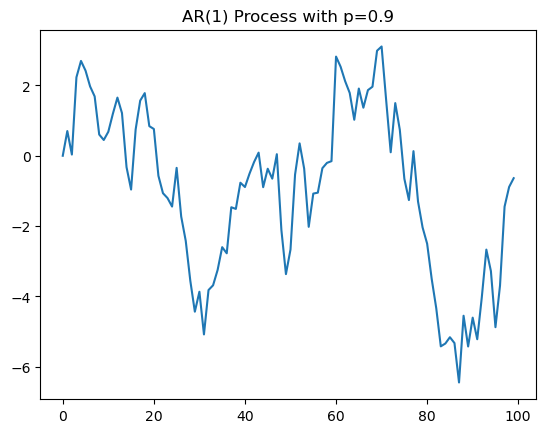

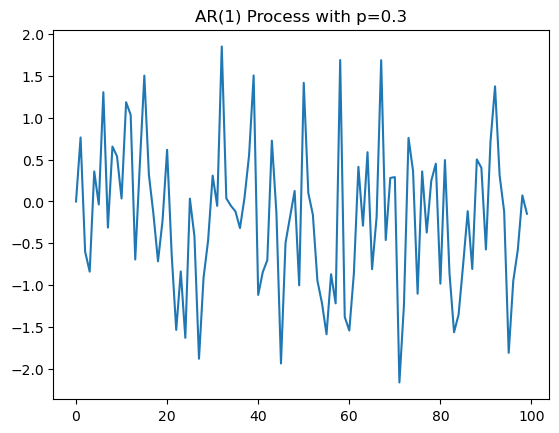

2.3696234962605995
0.8860823002773657


In [20]:
import statistics

plot_09 = plot_ar1_process(0.9, 100, 0)  
plot_03 = plot_ar1_process(0.3, 100, 0)  

print(statistics.stdev(plot_09))  
print(statistics.stdev(plot_03)) # As the persistence decreases from 0.9 to 0.3, the std decreases as well.

# 2. Regression from scratch

### a. First, we will generate some data. Set a parameter n, representing the number of data points, to 1000. Then, generate a vector of ones of length n and name it intercept.

In [9]:
n = 1000
intercept = np.repeat(1,n)

### b. Set the seed to 123 again by repeating the code from Question 0.

In [11]:
np.random.seed(123)

### c. Next generate x1, x2, and epsilon as vectors of length n drawn from random normal distributions with mean 0 and standard deviation 1.

In [13]:
x1 = np.random.normal(0, 1, n)
x2 = np.random.normal(0, 1, n)
epsilon = np.random.normal(0, 1, n)

### d. Generate the outcome variable y using the data generating process above and the vectors you generated in parts (a) and (b).

In [15]:
y = 2.3 + (3.1*x1) + (0.9*x2) + epsilon
y = y.reshape(-1, 1)
y[:5] #shows first five values for y so output is not too long.

array([[-3.51362314],
       [ 4.70122883],
       [ 4.91982562],
       [-2.40791943],
       [-0.58661941]])

### e. Create the matrix X by stacking x1, x2, and intercept.

In [17]:
X = np.column_stack((intercept, x1, x2))
print(X)

[[ 1.         -1.0856306  -0.74882747]
 [ 1.          0.99734545  0.56759473]
 [ 1.          0.2829785   0.71815054]
 ...
 [ 1.         -0.90932702 -0.35929672]
 [ 1.          0.47026375 -1.60969508]
 [ 1.         -1.11143045  0.01357006]]


### f. Calculate the OLS estimator using the formula above. Do these match the coefficients in the data generating process?

In [19]:
beta_hat = np.linalg.inv(X.T @ X) @ X.T @ y 
beta_hat # Coefficients are close to the coefficients from the data generating process.

array([[2.30920206],
       [3.0677746 ],
       [0.88522671]])

### g. Check the dimensions of X, beta_hat and epsilon to ensure we can use this formula to re-calculate y

In [21]:
np.shape(X)

(1000, 3)

In [23]:
np.shape(beta_hat)

(3, 1)

In [25]:
np.shape(epsilon)

(1000,)

### h. Use your estimated beta_hat in the previous equation to re-calculate y (including the error term) – call it y_tilde.

In [35]:
y_tilde = X @ beta_hat
y_tilde[:5]

array([[-1.68415001],
       [ 5.8712831 ],
       [ 3.81304235],
       [-3.19644914],
       [ 0.95457958]])

### i. Check if y and y_tilde are the exact same. If they are not, check if they are close (every element within 0.2)

In [37]:
equal_check = np.array_equal(y, y_tilde)
print("Are y and y_tilde the exact same value?" , equal_check)


Are y and y_tilde the exact same value? False


In [39]:
closeness_check = np.all(np.abs(y-y_tilde) < 0.2)
print("Are the elements all within 0.2 of eachother?", closeness_check)

Are the elements all within 0.2 of eachother? False


# 3. Temperature Conversion
### a. Create one array with the temperatures and another with the units.

In [79]:
temp_amnt = np.array([32, 0, 72, 212, 30, 100, -40,-10, 0])
temp_measure = np.array(["F", "C", "F", "F", "C", "C", "C", "C", "F"])

### b. Create a copy of the temperatures array that you can modify without changing the original. Call it temp_copy.

In [81]:
temp_copy = temp_amnt.copy()
temp_copy

array([ 32,   0,  72, 212,  30, 100, -40, -10,   0])

### c. Convert all temperatures in the temp_copy to Fahrenheit using code that directly modifies the elements of the temperature array corresponding to Celsius temperatures. Do not use a loop or comprehension.

In [83]:
(temp_copy * 1.8) + 32

array([ 89.6,  32. , 161.6, 413.6,  86. , 212. , -40. ,  14. ,  32. ])

### d. Now convert all temperatures to Fahrenheit using a vectorized function we have seen in the lectures. You will be able to use the original temperature array for this. Name your new array temp_f.

In [85]:
temp_f = np.where(temp_measure == "C", (9/5) * temp_amnt + 32, temp_amnt)
print(temp_f)

[ 32.  32.  72. 212.  86. 212. -40.  14.   0.]


### e. Define a function temp_c_to_f that implements your solution from the previous part as a function. It should accept an array of temperatures and an array of units, and return an array of temperatures in Fahrenheit. Demonstrate that it works with the original data and check that you get the same result as part (c).

In [87]:
def temp_c_to_f(temp_amnt, temp_measure):
    converted_temp = np.where(temp_measure == "C", (9/5) * temp_amnt + 32, temp_amnt)
    return converted_temp

In [89]:
temp_c_to_f(30, "C") # Shows function properly converts 30 F to 86 C

array(86.)

### f. Building on your previous solution, define a function temp_convert that accepts an array of temperatures, an array of units, and a unit to convert them all to (F or C). It should return the array of temperatures in specified unit (C by default). Demonstrate that it works with the original data, both for converting to Celsius and Fahrenheit. For Fahrenheit, check that you get the same result as previously.

In [91]:
def temp_convert(temp_amnmt, temp_measure, unit = "F"):
    if unit == "F":
        return np.where(temp_measure == "C", (9/5) * temp_amnt + 32, temp_amnt)
    elif unit == "C":
        return np.where(temp_measure == "C", (5/9) * temp_amnt - 32, temp_amnt)
    else:
        raise ValueError("Invalid target unit chosen.")
        

In [58]:
temp_convert(temp_amnt, temp_measure, unit = "F") # Converted all to F

array([ 32.,  32.,  72., 212.,  86., 212., -40.,  14.,   0.])

In [59]:
temp_convert(temp_amnt, temp_measure, unit = "C") # Converted all to C

array([ 32.        , -32.        ,  72.        , 212.        ,
       -15.33333333,  23.55555556, -54.22222222, -37.55555556,
         0.        ])

### g. Create a lookup table for conversion:
    Assemble the converted temperatures into a matrix with first column being the temperatures   
    Fahrenheit and the second column being the temperatures in Celsius
    Remove duplicates
    Sort the matrix by the Fahrenheit column
    Add a row at the top indicating the units of each column

In [99]:
f_temps = temp_convert(temp_amnt, temp_measure, unit = "F")
c_temps = temp_convert(temp_amnt, temp_measure, unit = "C")
conversion_matrix = np.column_stack((f_temps, c_temps))
unique_matrix = np.unique(conversion_matrix, axis = 0)
sorted_matrix = unique_matrix[np.argsort(unique_matrix[:, 0])]
table_header = np.array(["F", "C"])
lookup_table = np.vstack((table_header, sorted_matrix))

print(lookup_table)

[['F' 'C']
 ['-40.0' '-54.22222222222222']
 ['0.0' '0.0']
 ['14.0' '-37.55555555555556']
 ['32.0' '-32.0']
 ['32.0' '32.0']
 ['72.0' '72.0']
 ['86.0' '-15.333333333333332']
 ['212.0' '23.555555555555557']
 ['212.0' '212.0']]
